# Regression and model selection 

Regression is a standard problem of statiscal data analysis and machine learning. It consists in dermining a relationship between an independent variable $x$ and a (dependent) variable $y$ where the expectation value of $y$ is $E(y | x)$. 

The formal framing of the regression problem and its application to reression of linear and non linear model has been covered in the framework of statistical data analysis in the course [SPAT0002-1](https://github.com/SPAT0002-1/Ongoing/05-MLE_and_regression) and will not be repeated here. The focus of the present Notebook is to discuss how to tackle regression problems that were left aside, discuss regression in the framework of machine learning, and learn about the tools available in python to deal with a variety of regression problems.  

## Linear regressions

In ML linear regression generally refers to the fit of a straight line, but as we have seen in [SPAT0002-1](https://github.com/SPAT0002-1/Ongoing), in statistical modeling, linear refers to the linearity in the model parameters. Herebelow, we'll discuss other kinds of linear regression and present various tools allowing you to tackle linear regression problems. The matrix formalism that can be used to frame the linear regression problem is detailed in this [supplementary notebook](Regression_sup.ipynb#Fitting-a-straight-line). 

Within the `sklearn` and `astroML` APIs, linear regression is performed within the `linear_model` module. Tools to handle the most common situations are coded there. We will see hereafter how to: 
- Fit a function of one independent variable (i.e. straight line), but also of multiple independent variable. This is the [Multivariate regression](#Multivariate-regression) that you can solve using the `LinearRegression` class of `sklearn.linear_model`.
- Fit of a [polynomial function](#Polynomial-regression): the `PolynomialRegression` class of `astroML.linear_model` can be used to address that case. An alternative within `sklearn` will also be presented. 
- The fit of basis functions is also a linear regression problem. There is no generic method to deal with it within sklearn but `astroML.linear_model` includes a regression method for [Gaussian Basis function][#Gaussian-Basis-function-regression]. 


### Multivariate regression 

If instead of the regression of a straight line on $y = f(x)$, we have multiple variables $y = f(x_1, x_2, ..., x_n)$, then, the first family of linear model we may consider may consists in fitting an hyper-plane to those data. A similar formalism than the one used for the linear regression can be developped to find the solution of this regression problem. In practice, the `scikitlearn.linear_model.LinearRegression`directly implements this mutlivariate regression (remember that the feature matrix `X` has to have a shape `(n_samples, n_features)`. The same results can be obtained with the `astroML` module: `astroML.linear_model.LinearRegression`. If `X` has a shape `(n_samples, 1)`, the problem resumes to the standard "straight line" fit to a single independent variable. 

In [1]:
# multivariate regression 
from sklearn.linear_model import LinearRegression
import numpy as np 
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
 
#astroML.linear_model.LinearRegression

# Generate Fake data to test the Regression module 
Xtest = np.random.random((100,2)) # 100 points in 2D
dytest = np.zeros(100) + 0.1  # to add uncertainties around the truth
a, b1, b2 = 0, 1, 1
ytest = np.random.normal(a + b1 * Xtest[:,0] + b2 * Xtest[:,1], dytest) # y = a + b1 * x1 + b2 * x2

# Now we instantiate the estimator and fit the model (remember the sklearn workflow)
model = LinearRegression(fit_intercept=True)
model.fit(Xtest, ytest, dytest)

print(model.coef_, model.intercept_)    # beware, the interecept is NOT one of the coefficients


[0.99303642 0.92474556] 0.03221114156413751


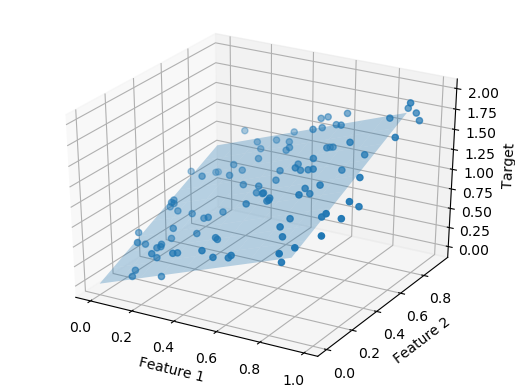

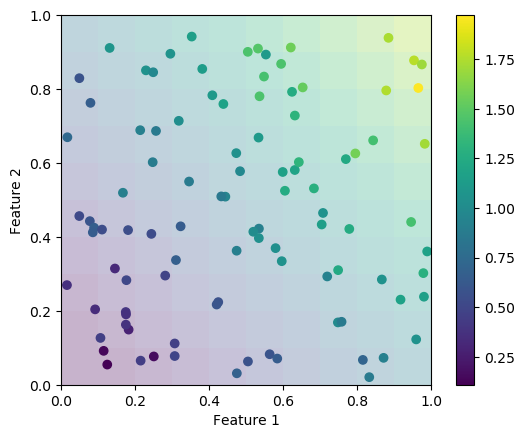

In [2]:
y_pred = model.predict(Xtest)

# visualise the results of the fit 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xtest[:,0], Xtest[:,1], ytest)

# overplot the surface
X = np.arange(0, 1, 0.1)
Y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = model.coef_[0]*X + model.coef_[1]*Y

ax.plot_surface(X, Y, Z, alpha=0.3)  
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

# 2D representation
f, ax = plt.subplots()
a = ax.scatter(Xtest[:,0], Xtest[:,1], c=ytest)
rng = (0, 1, 0, 1)
ax.imshow(Z, extent=rng, origin='lower', vmin=ytest.min(), vmax=ytest.max(), alpha=0.3)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.colorbar(a)

### Polynomial regression 

This is the case where the model is a polynomial of the form $f(x) = a_0 + a_1 x + a_2 x^2 + ...+ a_n x^n$. We have seen in numpy that the `numpy.polyfit()` function makes the job and enables you to handle polynomial models (don't be fooled, this is a linear model: the linearity is in the *parameters* of the model). However, this is not convenient to use this method in a machine learning project for which you may want to follow the analysis workflow we discussed in the first lecture. The `astroML` package implements the Polynomial regression "out of the box" (in `astroML.linear_model.PolynomialRegression`) and the syntax for using it is similar to the `scikit-learn` one (Jake Van der Plas has been involved in designing the 2 APIs). 

a_0: Truth=0.00 ; Fit = -0.01
a_1: Truth=0.00 ; Fit = 0.02
a_2: Truth=2.50 ; Fit = 2.47
a_3: Truth=5.00 ; Fit = 5.01


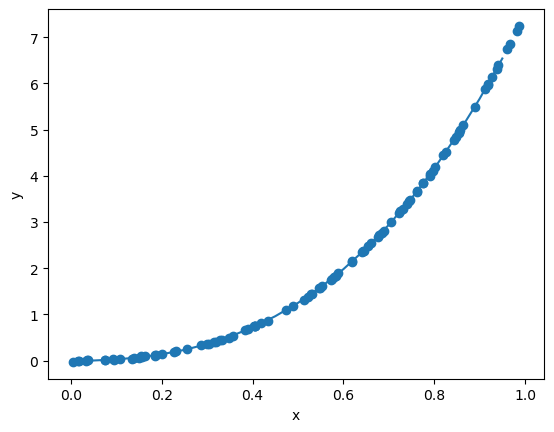

In [3]:
# Polynomial regression
#import numpy as np 
#from matplotlib import pyplot as plt
from astroML.linear_model import PolynomialRegression

# Creating a fake data set 
Xtest = np.random.random((100,1))
a_3, a_2, a_1, a_0 = 5.0, 2.5, 0., 0.  
a_truth = [a_0, a_1, a_2, a_3]
ytest = a_2*Xtest[:,0]**2 + a_3*Xtest[:,0]**3 + np.random.normal(0, 0.01, size=(100))

degree = 3
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(Xtest, ytest)

y_pred = model.predict(Xtest)
X_grd = np.arange(0,1.,0.05).reshape(-1,1)
y_pred_grd = model.predict(X_grd)
n_constraints = degree + 1
for i in range(degree+1):
    print('a_%i: Truth=%.2f ; Fit = %.2f'%(i, a_truth[i], model.coef_[i]))
plt.scatter(Xtest, ytest)
plt.plot(np.sort(X_grd), y_pred_grd)
plt.xlabel('x')
plt.ylabel('y');

While the Polynomial regression is not directly implemented within sklearn it is still possible to use sklearn to make a polynomial regression. The trick (see [VdP Data Science Handbook](#VdP)) consists in using the `pipeline` and the `preprocessing`classes were useful ingredients are present: 

``` python
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))
```
This implementation allows you to call the fit and predict methods but not e.g. the coefficients. 

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def myPolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

degree = 3
model2 = myPolynomialRegression(degree) # fit 3rd degree polynomial
model2.fit(Xtest, ytest)

y_pred = model2.predict(Xtest)

In [5]:
# model2 has no coef_ 
print(model2.coef_)

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [6]:
model2.score(Xtest, ytest)

0.9999794705142566

### Gaussian Basis function regression 

One can see a polynomial $f(x) = a_0 + a_1 x + a_2 x^2 + ...+ a_n x^n$ as a sum of non linear functions of $x$, i.e. $f(x) = a_0 + a_1 B_1(x) + a_2 B_2(x) + ...+ a_n B_n(x)$ (where $B_n(x)$ is an arbitrary basis function of our independent variable). You may therefore not be surprised that the previous formalism for polynomial regression can be generalised to arbitrary basis functions. There is no direct implementation within scikit-learn or astroML. Those two packages enable however to easily implement Gaussian basis function regression, which is an important and useful family of basis functions. Within astroML, you simply use the method `BasisFunctionRegression('gaussian', mu, sigma)` from the `astroML.linear_model` module. Within sklearn, you can do as for the Polynomial case but using the method `GaussianFeatures` instead of `PolynomialFeatures`. 

AstroML does not implement other basis functions regression than the Gaussian one. If, for instance, you want to fit for the coefficients of chebyshev polynomials, you may look at the polynomial module of numpy. For instance you can perform least-square regression of chebyshev polynomials with: [`numpy.polynomial.chebyshev.chebfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebfit.html#numpy-polynomial-chebyshev-chebfit). Other popular basis functions such as legendre, hermite and laguerre polynomials are available in `numpy.polynomial`. 


[-0.26562452  0.04030338  0.04192814  0.04391587  0.07114157  0.07732259
  0.09664386  0.10290449  0.11489624  0.1211668   0.14139866]


(-1, 2)

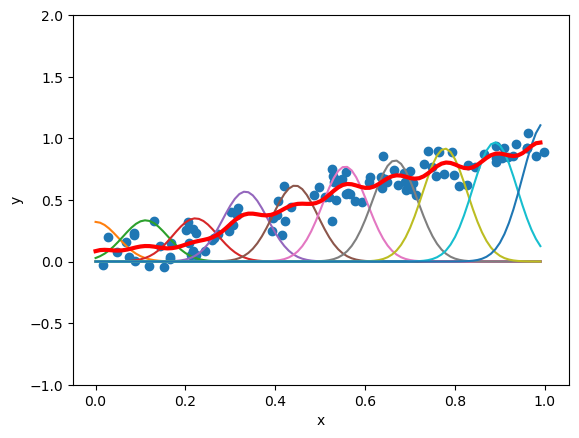

In [7]:
#Basis function regression looks like this
from astroML.linear_model import BasisFunctionRegression
import scipy.stats 

# Creating fake data
Xtest = np.random.random((100,1))    # Generate column vector w. 100 data points    
dytest = np.zeros(100) + 0.1  # to add uncertainties around the truth 
ytest = np.random.normal(Xtest[:,0], dytest)        # Equivalent to y = x but with uncertainty dy for each y       

# mean positions of the 10 Gaussians in the model
X_gridtest = np.linspace(0,1,10)[:, None]
# widths of these Gaussians
sigma_test = 0.05  # WIDTH of the gaussian, NOT uncertainty on data points 

model = BasisFunctionRegression('gaussian', mu=X_gridtest, sigma=sigma_test)
model.fit(Xtest, ytest, dytest)

y_pred = model.predict(Xtest)
print(model.coef_)  # coef_[0] = intercept ; 

X_grd = np.arange(0,1.,0.01).reshape(-1,1)
y_pred_grd = model.predict(np.sort(X_grd))
plt.scatter(Xtest, ytest)
plt.plot(np.sort(X_grd), y_pred_grd)
plt.xlabel('x')
plt.ylabel('y')

# now we can plot the 10 gaussian basis functions
compo = []
x_Gn = np.arange(0,1.,0.01)
for i in range(10): 
    Gn = scipy.stats.norm(X_gridtest[i], sigma_test)
    y_indiv = model.coef_[i+1] * Gn.pdf(x_Gn)
    compo.append(y_indiv)
    plt.plot(np.sort(x_Gn), y_indiv)
plt.plot(x_Gn, model.coef_[0]+np.sum(np.array(compo), axis=0), color='red', lw=3)
plt.ylim(-1, 2)

## Regression in a machine learning context

In the introduction lecture, we have seen that a machine learning problem generally starts with dividing your data set into 3 sub-subsets: 

- A **training** set: typically $\sim$ 50-70% of the sample. This is the sample on which the model is first train. 

- A **(cross)-validation** set: typically half of the remaining sample.

- A **test set**: The other half of the remaining sample. This is a sample "unseen by the model" on which the model efficacy is tested. 

Up to now, we have only worked with the training and the test sets. We have not considered this mysterious "cross-validation" subset. We'll see in this lecture what is the use of this subset. For this purpose, we need to have a more detailed look at model quality. 

## Bias, Variance, over/under-fitting and model selection

We have in hands a **training sample** consisting of $X_{\rm train}$, $y_{\rm train}$.  We then have a test set of $X_{\rm test}$ for which we want to predict $y_{\rm test}$. 

Let's consider an example data set generated based on the following underlying "ground truth model": 

$$y_i = x_i \sin(x_i) + \epsilon_i,$$

whith $$0\le x_i \le 3,$$

and the noise, $\epsilon_i$ is given by $\mathscr{N}(0,0.1)$ (we assume homoscedastic errors).

The next cell implements this example. Let's first use a straight line as our regression model.

Note that in machine learning, the $(x_i, y_i)$ do not have to be numerical values. One could consider $X$ as values of the magnitude of an object in 5-bands/filter, and $y_i$ as a label $(star, quasar)$. In such a case, the test set would be constituted of values of magnitudes for each object but without any associated label.  

In [8]:
# Ivezic v2, Figure 8.12, Modified by DS 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#from matplotlib import ticker
#from matplotlib.patches import FancyArrow
from matplotlib import pyplot as plt 
import numpy as np 
%matplotlib inline 

#------------------------------------------------------------
# Define the functional form of our ground truth
def func(x, dy=0.1):
    return np.random.normal(np.sin(x) * x, dy)

#------------------------------------------------------------
# select the (noisy) data 
np.random.seed(0)
# Let'generate 20 x values regularly spaced btw 0 and 3 w. 0 < xi < 3
x = np.linspace(0, 3, 22)[1:-1]  
dy = 0.1
y = func(x, dy)

#------------------------------------------------------------
# Let's consider that we also have another data set of 20 points 
# We'll use it later and call it cross validation data set 
np.random.seed(1)
x_cv = 3 * np.random.random(20)  # Random x between 0 and 3
y_cv = func(x_cv)

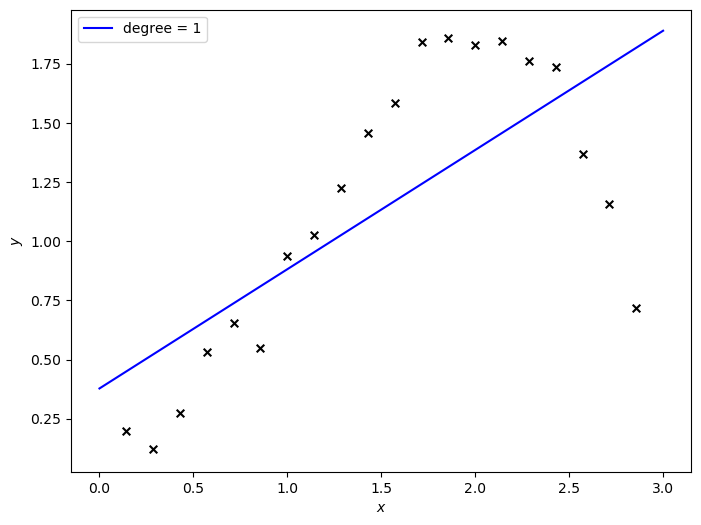

In [9]:
#------------------------------------------------------------
# First figure: plot points with the fit of a straight line
f, ax = plt.subplots(ncols=1, figsize=(8, 6))

ax.scatter(x, y, marker='x', c='k', s=30)

p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 3, 1000)  # The grid of points over which we plot our model
y_fit = np.polyval(p, x_fit)

ax.plot(x_fit, y_fit, '-b', label = "degree = 1")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend()

This model **underfits** the data and is said to be "biased" (in the sense that the estimated model parameters deviate significantly from the true model parameters). To quantify this bias, one can use various kinds of merit function. For some reasons, in machine learning, uncertainties on data points are often ignored / implicitely assumed to be the same. This is not systematic. A common merit function that is used is the **mean square error (MSE)** defined as: 

$$ 
\epsilon = \frac{1}{N} \sum_i^N (y_i - y_M(x_i))^2
$$ 

As it is used to compare models applied to the **same data**, its absolute meaning may not be too critical. Instead of merit function, one also speak of **metric**, which simply means a quantity that allows one to make quantitative comparisons between regressions. 

Note here that criteria also exist in the Bayesian framework to compare models of different complexities and assess which of the model reproducing equally well the data should be favoured (See e.g. Sec. 5.4 and 4.3 of our [book](#book) for details). Two of these criteria are the Aikake Information Criterion (**AIC**) and the Bayesian Information Criterion (**BIC**). Those criteria rely on information theory and comparison of likelihood between models. The BIC can be calculated based on the maximum value of the data likelihood $L^0(M)$ of a model $M$. Its formula is given by: 

$$ 
BIC \equiv -2\ln{[L^0(M)]} + k \, \ln{N},
$$ 

where $k$ is the number of model parameters and $N$ the number of data points. The AIC is a bit more expensive to calculate than the BIC, but makes less assumption regarding the posterior/likelihood of the parameters. Those criteria are best used to compare models with different number of parameters when small data sets are in hands. 

A straight line is a polynomial of order 1, so let's try polynomials of higher order.

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, '$y$')

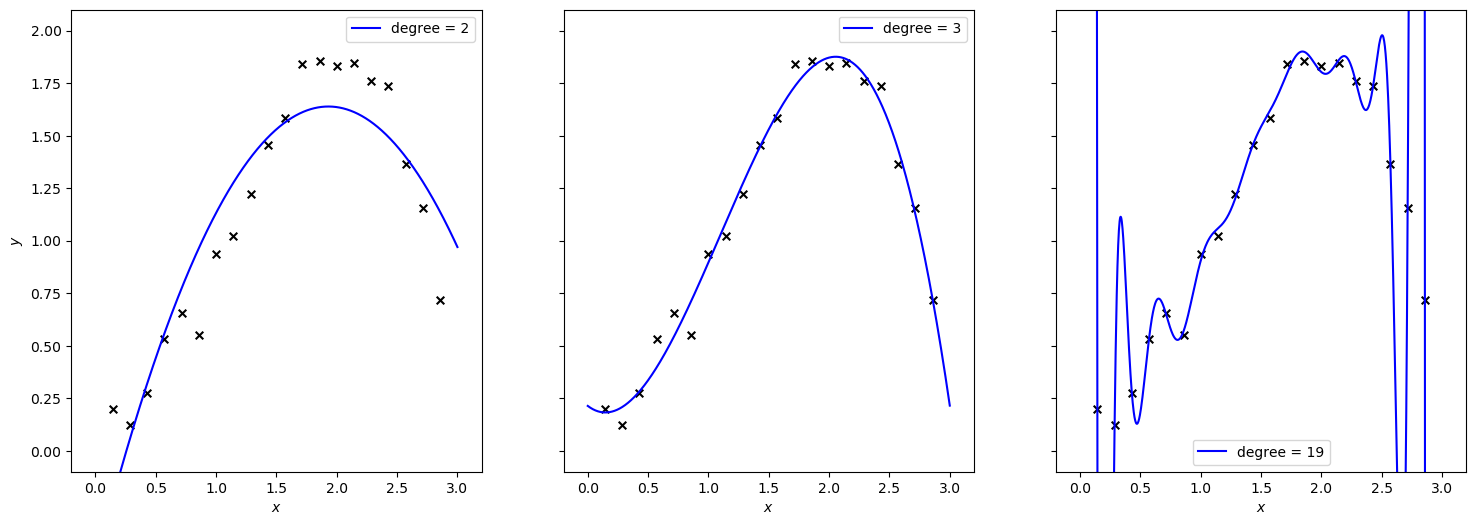

In [10]:
# Ivezic v2, Figure 8.13, modified by DS 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#------------------------------------------------------------
# Second figure: plot fit for several orders of polynomial
f, ax = plt.subplots(ncols=3, figsize=(18, 6), sharey=True)

for i, d in enumerate([2, 3, 19]):  #Try 2nd, 3rd and 19th order
    ax[i].scatter(x, y, marker='x', c='k', s=30)

    p = np.polyfit(x, y, d)
    y_fit = np.polyval(p, x_fit)

    ax[i].plot(x_fit, y_fit, '-b', label='degree = %i'%d)
    ax[i].set_ylim(-0.1, 2.1)
    ax[i].set_xlim(-0.2, 3.2)   
    ax[i].set_xlabel('$x$')
    ax[i].legend()
    
ax[0].set_ylabel('$y$')

We see that the degree 2 polynomial provides a better fit (i.e. it is less biased),  and order 3 an even better one (almost unbiased). The degree 19 fit is also unbiased but reproduces all the points perfectly. It is what we would call an **overfit**. This latter model is also said to have a **high variance**: this means that the model best-parameters will change substantially if you make small perturbation to one of the data points. 

As for "standard regression", one may ask **how do we choose our model / what is the "right" answer?**. The main objective is to find a trade-off between bias, variance and model complexity in an objective way, as illustrated on the following figure: 

![Bias-Variance_complexity_Trade-off.png](../Figures/Bias-Variance_complexity_Trade-off.png)
(c) L. Delchambre


The idea, in machine learning, is to take advantage of the fact that in general **many** data are available. Therefore, you may use those other data / a subsample of the original data (*not used for training*) to select the best model based on metrics that reflect bias and variance. This is where **cross-validation** (one often drop the "cross" prefix) subset enters into the game. 

## Cross-validation 

There are a variety of cross validation strategies (see 8.11.3 of our [book](book)). The simplest one is as described above: one reserves between 15 and 25\% of the sample for cross-validation. 

Another strategy is the **k-fold** cross validation (generally $k$ is about 5 to 10). It works as follows: 

- Split the data into $k+1$ subsets; the test set and $k$ CV sets. How you do this is up to you, but typically through random shufflings with equal numbers of points.
- $k$ models are trained, each time leaving out one of the CV sets in order to measure the CV error.
- The final training and CV error can be computed using the mean or median of the set of results. As often, the median may be more reliable (but it converges more slowly ... so if mean and median are similar, you may consider the mean).
![Cross_validation_sketch](../Figures/Cross_validation_sketch.png)
(c) Amidi et al. Cheat Sheet. 

Note here that we do not see the test set anymore. In fact, the litterature commonly make the (implicit) assumption that you have a separate test set, so discussion focuses on a subset which is consituted of the data that you would use for training *and* cross-validation. 

See the following GIF of $3$-fold CV from the [Wikipedia article](https://www.wikiwand.com/en/Cross-validation_(statistics)).


![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/KfoldCV.gif/1920px-KfoldCV.gif?1616979144969)

### How do we compare models based on training and CV substets? 

The training set is used to determine the model parameters, $\theta_j$. Then the idea is to compare the results of the fit for the training and cross-validation based on some metric that encodes the quality of the fit. The good fit obtained in the above exampled for a `degree = 19` polynomial should be a bad fit with a new subset (i.e. the cross validation). The comparison of a quantity that measures the quality of the fit for the training and the cross validation should allow us to figure it out.  

Hence, we will calculate the MSE, or the square root of the MSE, also called RMS error, for the training ($\epsilon_{\rm tr}$) and cross validation ($\epsilon_{\rm CV}$) samples:

$$
\epsilon_{\rm cv/tr} = \sqrt{\frac{1}{n}\sum_{i=1}^{N_{\rm cv/tr}}
  \left[y_i - \sum_{m=0}^d \theta_0^{(n)}x_i^m\right]^2}
$$


<div class="alert alert-block alert-warning"> 
<b>  Why do we need both a training set and a cross-validation set? </b>

 - The **model parameters**, $\theta_j$, are learned from the **training set**,
 - But the **"hyperparameters"** (in this case the model degree) are learned from the **cross-validation set**. 

 *The test set then provides the best estimate of the error expected for a new set of unlabeled data.* In other words, the test set tells us how well a new model will perform with a new data set. 

</div>

We show this graphically in the next figure ([Ivezic et al](#book), 8.14), where the **training and cross-validation rms errors** are computed as a function of polynomial degree, and also compared with the **model BIC**. 

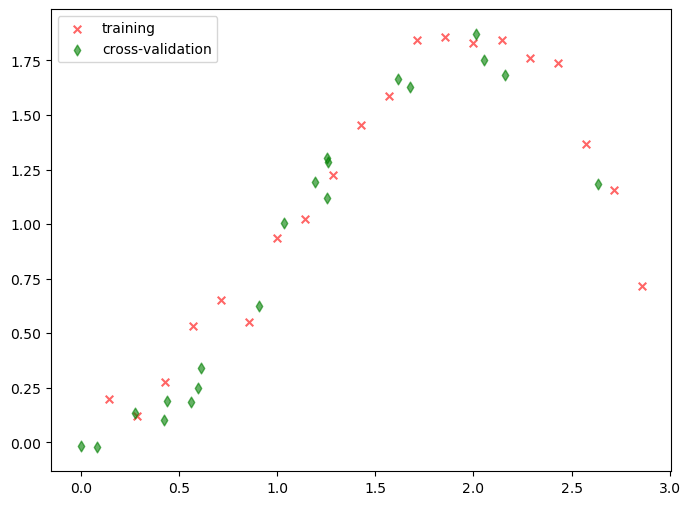

In [11]:
# For this example, we had a cross validation sample 
# Let's visualise it and compare to the original data 
f, ax = plt.subplots(ncols=1, figsize=(8, 6))

ax.scatter(x, y, marker='x', c='r', s=30, alpha=0.6, label='training')
ax.scatter(x_cv, y_cv, marker='d', c='g', alpha=0.6, s=30, label='cross-validation')
ax.legend()

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'BIC')

<Figure size 800x800 with 0 Axes>

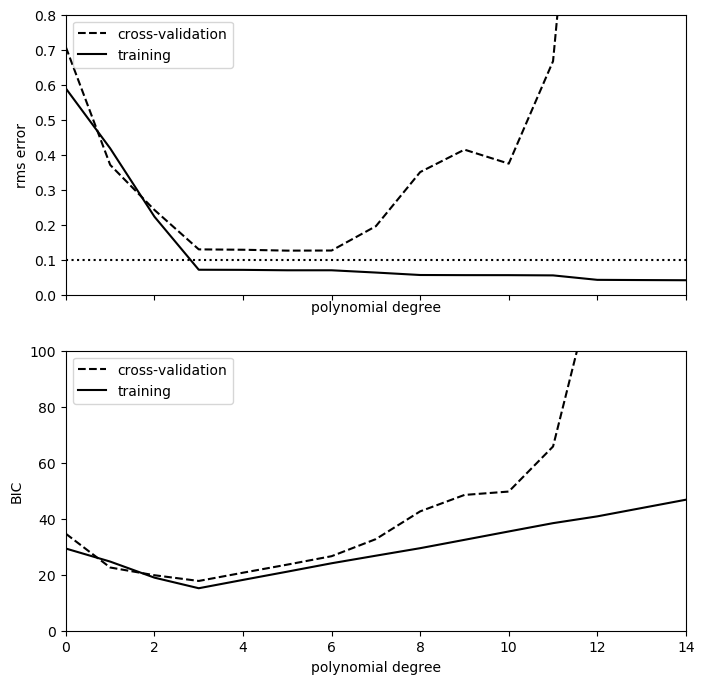

In [12]:
# Ivezic v2, Based on Figure 8.14, Adapted by DS - correct BIC calculation + plot display
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#------------------------------------------------------------
# Let's calculate the RMS for the training and cross validation 
# and compare errors as a function of polynomial degree d

d = np.arange(0, 21)  # Array with the polynom order
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

fig = plt.figure(figsize=(8, 8))

for i in range(len(d)):
    p = np.polyfit(x, y, d[i])
    # Calculate RMS for the training 
    training_err[i] = np.sqrt(np.sum((np.polyval(p, x) - y) ** 2)
                              / len(y))
    # Calculate RMS for the CV
    crossval_err[i] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

# Calculate the BIC = chi2 + (d+1) ln(N) 
BIC_train = np.sqrt(len(y)) * training_err / dy + (d+1) * np.log(len(y))
BIC_crossval = np.sqrt(len(y_cv)) * crossval_err / dy + (d+1) * np.log(len(y_cv))

#----------------------------------------------
# PLOT of the LEARNING CURVES
f, ax = plt.subplots(nrows=2, figsize=(8, 8), sharex=True)

#RMS error 
ax[0].plot(d, crossval_err, '--k', label='cross-validation')
ax[0].plot(d, training_err, '-k', label='training')
ax[0].plot(d, 0.1 * np.ones(d.shape), ':k')

ax[0].set_xlim(0, 14)
ax[0].set_ylim(0, 0.8)

[ax[j].set_xlabel('polynomial degree') for j in range(2)]; 
ax[0].set_ylabel('rms error')
ax[0].legend(loc=2)

# BIC comparison
ax[1].plot(d, BIC_crossval, '--k', label='cross-validation')
ax[1].plot(d, BIC_train, '-k', label='training')
ax[1].set_ylim(0, 100)
ax[1].legend(loc=2)
ax[1].set_ylabel('BIC')
#plt.tight_layout()

How do we interpret those curves?  

- For low order, both the training and CV error are high. This is sign of a **high-bias model** and that our model is **underfitting** the data.  
- For high order, the training error becomes small (by definition), but the CV error is large. This is the sign of a **high-variance model**. Our model is **overfitting** the data. As we already noticed by visualising the training for high degree polynomial, the model starts to match fluctuations that are not real. The "non reality" of those features is assessed by the CV analysis. 
- The best model is for $d = 3$. 

Hopefully that helps you understand how to use cross validation to help you both **fit your model and decide on the optimal level of model complexity** (provided this makes sense for your problem to compare the model complexity). 

## Exercises

Supernova exercise - Fit with linear and polynomial model ; evaluate the best model using the methods seen above

- First, explore fitting this data with Linear, polynomial regression and with Gaussian Basis function regression 
    * Start from linear regression and polynomial regression
    * For the case of  polynomial regression, just fit many of them for now (e.g. up to order 18).
    * Optional: For the Gaussian Basis functions, you can make arbitrary choices regarding the widths of the Gaussians and mean $\mu$ of each gaussian. A common practice is to consider linearly distributed centroid over the range of interest. Compare the case where the $\sigma$ of each gaussian is equal to $\sigma_i = \Delta \mu = \mu_i+1 - \mu_i$ (the difference of centroid between to consecutive basis function) to the case where you use the same arbitrary $sigma$ independently of the number of basis functions.   
    * For the polynomial case, which fit is the best?
    * In what cases are you underfitting the data?
    * In what cases are you overfitting the data?
- Now split the data into training and validation sets
    * Implement a cross-validation procedure (Tip: you may have to do it by hand. The function np.setdif1d() might be useful for this process. Alternatively, `train_test_split()` from `scikitlearn.model_selection`) 
- What is the best order? Overlay your result on the data !

(35, 50)

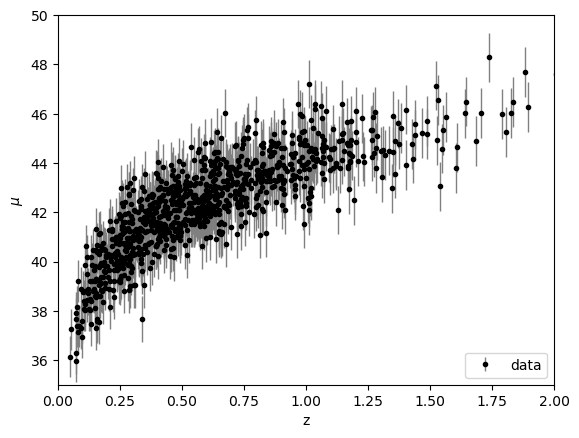

In [13]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(1000, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

Link to the [Solution](Regression_Exr.ipynb) (to be posted after Lecture)

In [14]:
# Solve the exercise here, or create your own notebook for working on the solutions 

### Do we need more data? Learning Curves

Of course more data means a better fit... but a some point data are all the same!

In general there are several possibilities to improve model fitting: 
- **Get more training data**: this does not always guarantees a better fit. 
- **Use a more/less complicated model**: If more training data do not improve the model, it is likely that the model is a problem. 
- **Use more/less regularization**: Regularisation (a topic we have not really discussed but see [Regression_sup.ipynb](Regression_sup.ipynb#Regularization-and-penalization-of-the-likelihood) has typically the same effect as decreasing model complexity. 
- **Increase number of features**: the variance that you have in your model may be explained / caused by a feature which is not part of your current training label (your $y_i$). An example is the Tully-Fisher relation which related galaxy luminosity to their velocity dispersion. This is a rather tight relation with some scatter, but the scatter is reduced when a third observation/parameter (the effective radius of the galaxy) is accounted for (Fundamental plane of galaxies).  

We can use a tool called a **[learning curve](https://en.wikipedia.org/wiki/Learning_curve)** to determine if (for a given model) having more training data would help improve the model fitting. This is a different question than above-- rather than try to get a better model of the data, we're trying to improve the quality of our data set. 

For building the learning curve, the training and CV error are computed as *a function of the number of training points*. In general:
- **The training error increases with $N_\mathrm{train}$.** For a given model, it's easier to fit fewer data points.
- **The CV error decreases wtih $N_\mathrm{train}$.** For a given model, a greater number of training points reduces the chances of over-fitting, resulting in better performance of the model in the cross-validation stage.

Let's look at this for the same data (but with training data and 100 cross validation data) and model as above. **BEWARE** that for this comparison we always use the **full** cross validation sample (i.e. 100 data points), whatever the number of points used as data. 

/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


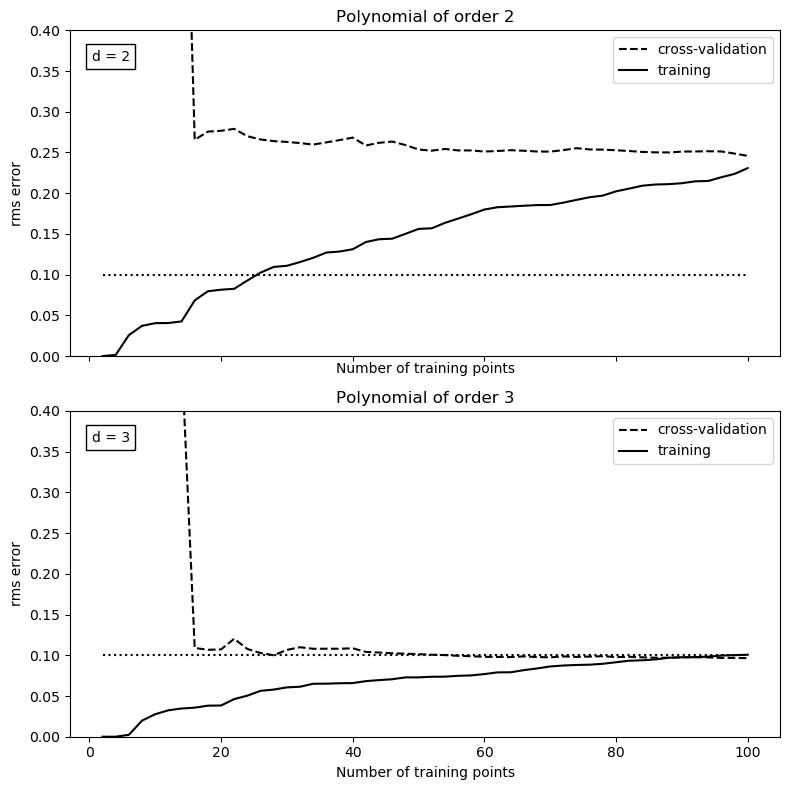

In [15]:
# Ivezic v2, Figure 8.15, Adapted by DS.
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#----------------------------------------------------------------------
# Original model (defined in another cell) and copied here for convenience 
#def func(x, dy=0.1):
#     return np.random.normal(np.sin(x) * x, dy)

# Let's now build a larger training set 
# (this is for illustration; in reality you do not build your training set)
np.random.seed(0)
x = 3 * np.random.random(100)  # Remember our x should be uniformly distributed  in [0,3]
y = func(x)  # this function has been defined earlier and builds the data set 

# -----------------------------------
# cross-validation (same comment as above: you do not build a CV set)
# For illustration we take a cv of the same size as the training
# This is as if we had a 50-50 split btw training and CV
np.random.seed(1)
x_cv = 3 * np.random.random(100)
y_cv = func(x_cv)

# ------------------------------------
Nrange = np.arange(2, 101, 2) # Number of points over which we will evaluate the model 

# We build arrays to save the RMS for the training and the CV
training_err = np.zeros(Nrange.shape)
crossval_err = np.zeros(Nrange.shape)

f, ax = plt.subplots(nrows=2, figsize=(8, 8), sharex=True)

for i, d in enumerate([2, 3]):   # We will calculate the learning curve for degree=2, and degree=3
    for j, N in enumerate(Nrange):
        p = np.polyfit(x[:N], y[:N], d)

        # Calculate RMS for the training 
        training_err[j] = np.sqrt(np.sum((np.polyval(p, x[:N]) - y[:N]) ** 2)
                              / len(y))
        # Calculate RMS for the CV
        crossval_err[j] = np.sqrt(np.sum((np.polyval(p, x_cv) - y_cv) ** 2)
                              / len(y_cv))

    #----------------------------------------------
    # PLOT of the LEARNING CURVES
    #RMS error 
    ax[i].plot(Nrange, crossval_err, '--k', label='cross-validation')
    ax[i].plot(Nrange, training_err, '-k', label='training')
    ax[i].plot(Nrange, dy * np.ones(Nrange.shape), ':k') # intrinsic scatter in the original data
    ax[i].set_xlabel('Number of training points')
    ax[i].set_ylabel('rms error')
    ax[i].legend(loc='best')
    ax[i].set_ylim(0, 0.4)
    ax[i].set_title('Polynomial of order %i'%d)
    ax[i].text(0.03, 0.94, "d = %i" % d, transform=ax[i].transAxes,
            ha='left', va='top', bbox=dict(ec='k', fc='w'))

plt.tight_layout()

There are two possible regimes that we also see on the above figures:

1. ***The training and CV errors have converged:*** (bottom pannel, $N_{\mathrm {train}} > 70$, and to some extent upper panel, around $N_{\mathrm {train}} \sim 100$) This indicates that the model is "dominated by bias". Increasing the number of training points is futile. If the error is too high (upper pannel; bias is non zero), you instead need a more complex model, not more training data. Decrease regularisation (if present) may also help. 

2. ***The training error is smaller than the CV error:*** (typically $N_{\mathrm {train}} < 70$, but for sure $N_{\mathrm {train}} < 14$) This indicates that the model is dominated by variance (this is often associated to overfitting).  Increasing the number of training points may help to improve the model. Increase the amplitude of the regularisation  (if present) may also help. 

The sharp transition in the relative difference of rms error between the training and cross validation for both cases around $N_{\mathrm {train}} \sim 14$ nicely illustrates the asset of adding data points. 

#### Caveats: 

It is important to look at the learning curve for various model complexities. In that sense, the learning curve and the rms error plotted as a function of the degree polynomial are very complementary and one should look at both of them together. Another more critical caveat is the implicit assumption on the statistical properties of the data points: the analysis above implicitly assumes that the training, cross validation and test sets have the **same statistical properties** (e.g. the same uncertainties affect the data points). If this is not the case, then those diagnostic plots will provide incorrect conclusions. This is also one of the reason why an important step of any machine learning analysis consists in **understanding and censoring** your data: check for the presence of outliers, of missing data, of non relevant features (i.e. remove features/labels that are irrelevant for the problem). We'll rediscuss that aspect of "cleaning and censoring your data" in a later lecture.    


### Learning curves within scikit-learn 

You can find methods in [sklearn.model_selection.learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) to calculate learning curve an perform model selection. In brief, to run the `learning_curve()` method, you'll need to provide severak arguments: 
- **estimator**: An object type that implements the `fit` and `predict` methods. For regression, this may be e.g. a `LinearRegression()` object (e.g. `lin_reg = LinearRegression()`).  
- **X, y**: The features and target arrays. 
- **train_sizes**: The relative or absolute numbers of training examples that will be used to generate the learning curve. By default, this will be an array `np.linspace(0.1, 1.0, 5)`, which means that there will be 5 training samples of size increasing from 10\% to 100\% of the training sample (see cv to understand how the size of the training is evaluated).
- **scoring**: The name of of the [scoring metric](https://scikit-learn.org/stable/modules/model_evaluation.html). The mean squared error (MSE) is effectively called `neg_mean_squared_error` 
- **cv**: number of k-fold cross validation samples (but other cv strategies are possible, see the help of the learning curve). 

Below we apply this to the [California Housing data](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). This data set contains **8 attributes (features)** that can be used to predict the price of houses for California districts. The target variable is the median house value in those districts expressed in hundreds of thousands of dollars ($100000).
Note that the application below aims at illustrating how to calculate learning curves within sklearn

In [16]:
#Execute this cell to read in the data
#Also identify the index of the "Number of Rooms" attribute
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Number of entries in the data set: 20640
Fraction of data used for CV 0.10


(0, 4)

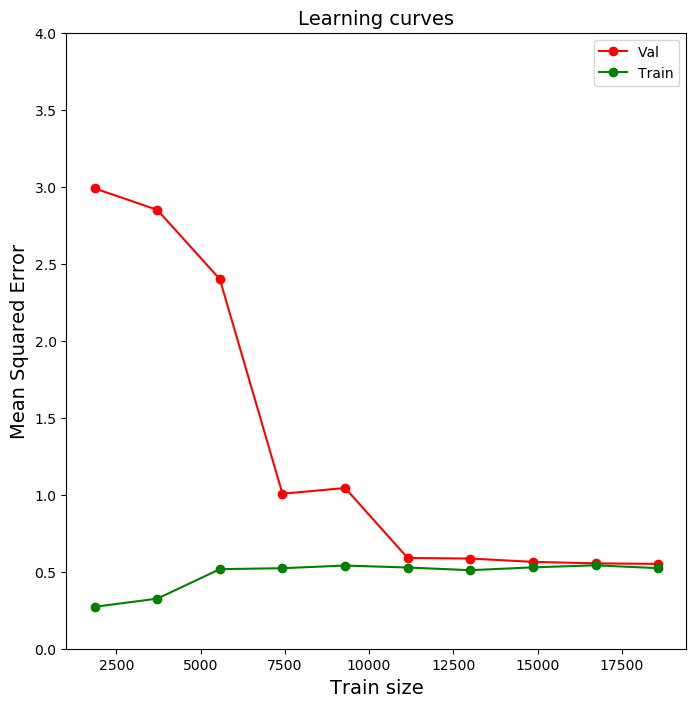

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

housing = fetch_california_housing()
X = housing.data
y = housing.target

print('Number of entries in the data set:', len(y))

scaler = StandardScaler()    # Standardize features by removing the mean and scaling to unit variance.
Xscaled = scaler.fit_transform(X)

lin_reg = LinearRegression()    # We selecte the regression, i.e. a multi-linear regression 

# Ten training sample sizes from 10% to 100%
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(lin_reg, Xscaled, y, train_sizes=np.linspace(0.1, 1, 10), \
    scoring="neg_mean_squared_error", cv=10)

# Verification that the 100% case is not 100% of the data, but 100% of the training ! 
# Fraction of the data left aside for CV (this is governed by the "cv" argument above
cvfrac = (float(y.shape[0])-train_sizes.max()) / float(y.shape[0])
print('Fraction of data used for CV %.2f'%cvfrac)

fig = plt.figure(figsize=(8, 8))

plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', color="r", label="Val")
plt.plot(train_sizes, -train_scores_linreg.mean(1), 'o-', color="g", label="Train")
                   
plt.xlabel("Train size",fontsize=14)
plt.ylabel("Mean Squared Error",fontsize=14)
plt.title('Learning curves',fontsize=14)
plt.legend(loc="best")
plt.ylim(0,4)

After digging a bit into learning curves, you'll see that various metrics are implemented in sklearn to compare models as described in the [sklearn model evaluation help](https://scikit-learn.org/stable/modules/model_evaluation.html). An overview (and description) of the metric functions available in sklearn (for various supervised problems) is given [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). We'll discuss some of those metrics in a future lecture. 

## Gaussian Process Regression (GPR)

Gaussian Processes (GP) are a non-parametric supervised learning method used to solve regression and probabilistic classification problems. As you will see below, this is **different** from regression with a basis of gaussian functions. 

GPR is a widely applicable and common regression technique. It is particularly useful to perform *interpolation*, with the additional asset that it does provide uncertainties on the interepolated region. The [scikit-learn documentation](https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process) provides a detailed description of this method. We will highlight some key aspects below. A more exhaustive reference is  **[Rasmussen and Williams "Gaussian Processes for Machine Learning" (2005)](http://www.gaussianprocess.org/gpml/)**. 

For an overview of applications to astronomical problems, you should consult the review of Aigrain and Foreman-Mackey: [Gaussian process regression for astronomical time-series](https://arxiv.org/abs/2209.08940)

So, what are Gaussian processes exactly? 

The formal definition is: 
> *A **[Gaussian Process](https://en.wikipedia.org/wiki/Gaussian_process) (GP)** is a collection of random variables in a parameter space for which any subset can be defined by a joint Gaussian distribution.*

In loose words, a gaussian process is the generalisation of the Gaussian Probability distribution for random variables ($\bf{x}$), to functions (of random variables ) $f(\bf{x})$. Similarly to the Gaussian PDF, characterised by a mean value $\mu$ and a variance $\sigma^2$, the GP is characterised by a "mean function $m(\bf{x})$ and a covariance function $k(\bf{x}, \bf{x^{\prime}})$ . 

The Gaussian process is commonly written as: 

$$
f(\bf{x}) \sim \mathcal{GP}(m(\bf{x}), k(\bf{x}, \bf{x}^{\prime}) ).
$$

Because the mean function $m$ and covariance function are effectively evaluated over a finite number of values, we effectively work with a mean vector $m$ whose elements are $m_i = m(x_i, \theta)$ and a covariance matrix  $K$ whose elements are $K_{ij} = k(x_i, x_j, \phi)$. The parameters $\theta$ and $\phi$ are known as the *hyper-parameters* of the GP. 

By definition, the joint probability distribution over a sample $\bf{y} = {y_i}_{i=1, ..., N}$ from the GP is a multivariate Gaussian: 
$$
p(\bf{y}) = \mathcal{N}(\bf{m}, \bf{K})
$$


For illustration, let's consider a dimensional situation, where we have 4 random variables ${x_1, x_2, x_3, x_4}$ which have values ${y_1, y_2, y_3, y_4}$. 

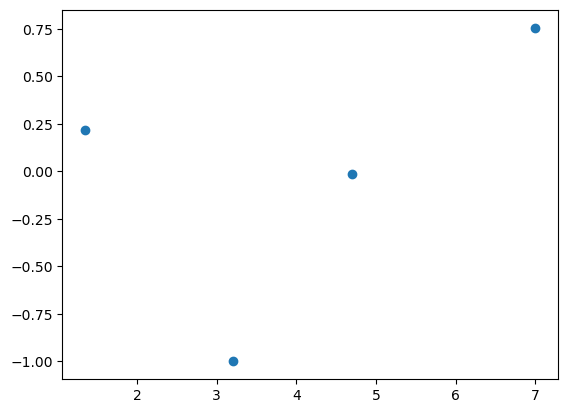

In [18]:
# let's consider 4 points drawn from a generative function cos(x) 
xi = np.array([1.35, 3.2, 4.7, 7])
yi = np.cos(xi)
f, ax = plt.subplots()
ax.scatter(xi, yi)

The problem we have is to find a function that smoothly go through those points. The way we would enforce the function to "go through the points" (i.e. if  $f^*(x)$ is the fonction we seek, we want ($f^*(x_1) = y_1$, ..., $f^*(x_4) = y_4$). The standard regression approach consists in defining a class of functions (e.g. a linear model) and maximizing the likelihood. In a bayesian framework, we can also see this regression problem as a combination of the posteriors associated to each data points (Look back to the Notebook [Bayesian_regression_revisited.ipynb](https://github.com/SPAT0002-1/Ongoing/blob/main/06-Bayesian_inference_MCMC/Bayesian_regression_revisited.ipynb) from SPAT0002). Each time we were adding a data point, we are restricting the number of possible functions. This ensemble of possible functions (all the lines with a range of slopes and intercept in case of the straight line regression) could be chosen arbitrarily such that the generated $f^*(\bf{x})$ fall in the range of interest. 

Let's take $\mathcal{GP}(0, k(\bf{x}, \bf{x}^{\prime})$ with $k(\bf{x_p}, \bf{x_q}) = \exp(-0.5 |\bf{x}_p - \bf{x_q}|^2 / h^2)$,  where the kernel is a squared exponentional of width h (yes, it looks like a gaussian but the only parameter is $h$. It is called squared exponential ... GP are NOT called GP because of this kernel choice, **other choices are possible**!). In the figure below, the gray band represents our GP prior, and the 3 curves represent 3 functions randomly drawn from that prior. 

Note that there are typically two kinds of kernels: **stationary** and **non-stationary** kernels. Stationary kernels only depend on the distance between 2 data points while non-stationnary kernels also depend on the value of the data points. The squared exponential is a stationary kernel. 

In [19]:
# Inspired by Ivezic v2, Figure 8.10 & Fig. 2.2 of RW2006
# Author: Jake VanderPlas
# License: BSD

def squared_exponential(xp, xq, h):
    '''
    Kernel k(x_p, x_q) of widh h
    '''
    return np.exp(-0.5 * (xp - xq) ** 2 / h ** 2)

np.random.seed(1)

NG = 100 # This sets the number of Gaussians and number of points over which we evaluate f(x)
x = np.linspace(0, 10, NG)      # we consider the range over which we work / have data
h = 1.  #This is the Bandwidth of the kernel

# The mean of the kernel ; identical for all xp
mu = np.zeros(len(x))
# We calculate the kernel between pairs of point
C = squared_exponential(x, x[:, None], h)    

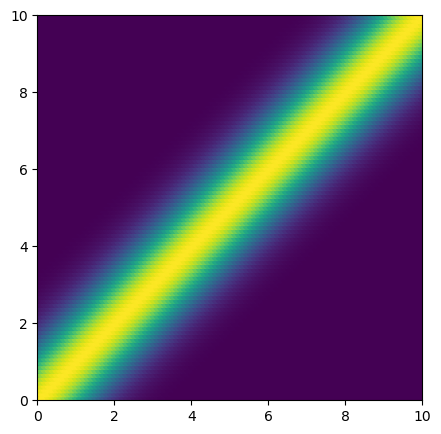

In [20]:
# Let's visualise the covariance matrix
# Redo, changing the width of the kernel
XX, YY = np.meshgrid(x, x)
f, ax = plt.subplots(nrows=1, figsize=(5,5))
ax.scatter(XX, YY, c=C)
ax.set_xlim(0,10), ax.set_ylim(0,10)
ax.set_aspect('equal')
# beware, this is NOT a multivariate distribution, it is only a graphical visualisation of the covariance matrix
# bright regions indicates which pairs of points have values "y" that are strongly correlated. Dark regions
# are not strongly correlated. 

(0, 10)

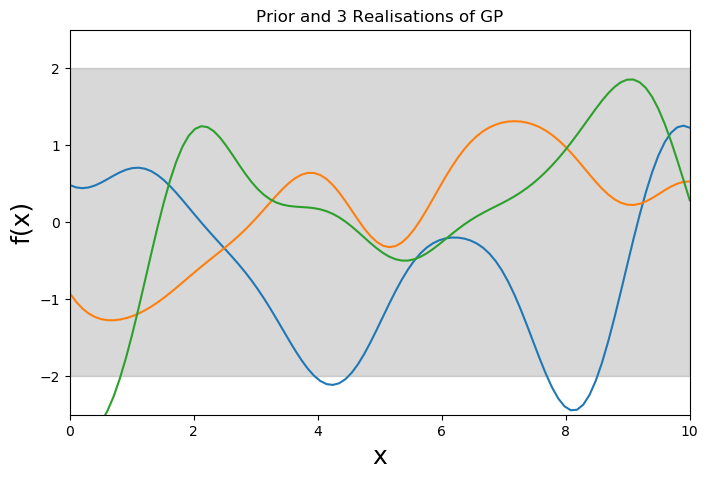

In [21]:
# We draw 3 realisations of the GP from a multivariate normal distrib with cov=C
draws = np.random.multivariate_normal(mu, C, 3)
f, ax = plt.subplots(ncols=1, figsize=(8,5))

ax.fill_between(x, -2, 2, color='gray', alpha=0.3)
for i in range(3):
    ax.plot(x, draws[i,:].T)

ax.set_ylabel('f(x)', size=18)
ax.set_xlabel('x', size=18) 
ax.set_title('Prior and 3 Realisations of GP')
ax.set_ylim(-2.5, 2.5)
ax.set_xlim(0, 10)

Once we have data points, we limit the possible GP realisations, as we need the GP to to have the values fixed by the data points. For our example, this means $f^*(x_i) = y_i$ for $i=(1,2,3,4)$ (i.e. the posterior can be calculated in presence of data points and is simply the prior conditioned on the data points). 

(0, 10)

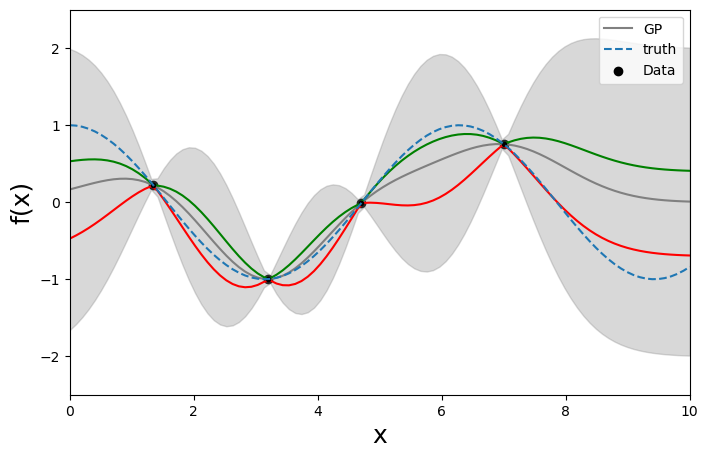

In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
gp1 = GaussianProcessRegressor() # instantiate the regressor
gp1.fit(xi[:, None], yi)  # effectively do the fit
f1, f1_err = gp1.predict(x[:, None], return_std=True)  # predict 

f, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.scatter(xi, yi, color='k', label='Data')
ax.plot(x, f1, '-', color='gray', label='GP')
ax.plot(x, f1 + 0.4 * f1_err, '-', color='green')
ax.plot(x, f1 - 0.7 * f1_err, '-', color='red')
# Note here HOW to fit between 2 curves
ax.fill_between(x, f1 - 2 * f1_err, f1 + 2 * f1_err, color='gray', alpha=0.3) 
ax.plot(xi, yi, '.k')
ax.plot(x, np.cos(x), ls='--', label='truth')
ax.legend()
ax.set_ylabel('f(x)', size=18)
ax.set_xlabel('x', size=18) 
ax.set_ylim(-2.5, 2.5)
ax.set_xlim(0, 10)

The family of authorised GP is reduced because of the data points. The gray shaded region reflects the 2 sigma uncertainty (95% credible interval) on the function and the colored curves show random functions drawn from posterior. 
The dashed curve shows the original cosine function we used to generate the data. We see that the latter falls within the gray shaded region.

**Does this work if data points have uncertainties?**

YES ! GPR can also be applied to data points with additive independent identically distributed Gaussian noise. We need to add the argument `alpha` to the regressor. The later is the variance on the data points. Let's have a look below: 

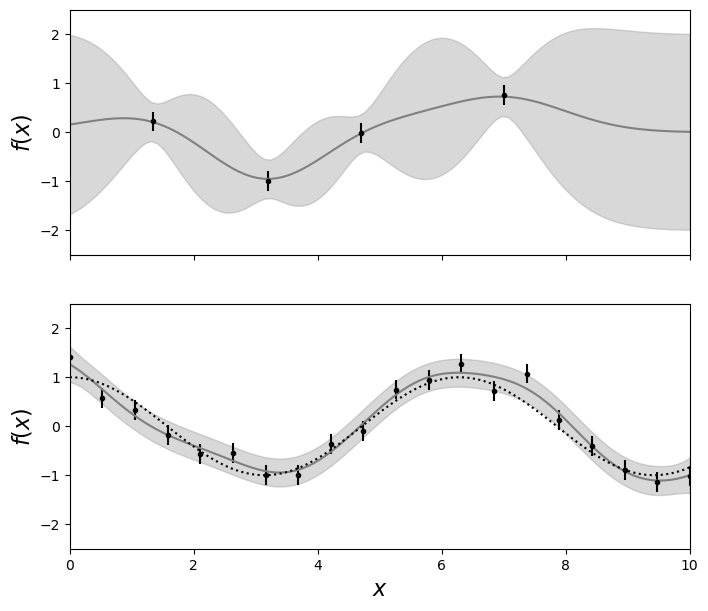

In [23]:
dy2 = 0.2

gp2 = GaussianProcessRegressor(alpha=dy2 ** 2, random_state=0)
gp2.fit(xi[:, None], yi)
f2, f2_err = gp2.predict(x[:, None], return_std=True)

#------------------------------------------------------------
# Constrain the mean and covariance with many noisy points
x3 = np.linspace(0, 10, 20)
y3 = np.cos(x3)
dy3 = 0.2
y3 = np.random.normal(y3, dy3)

gp3 = GaussianProcessRegressor(alpha=dy3 ** 2, random_state=0)
gp3.fit(x3[:, None], y3)
f3, f3_err = gp3.predict(x[:, None], return_std=True)
#------------------------------------------------------------
# Plot of the results
f, ax = plt.subplots(figsize=(8, 7), nrows=2, sharex=True)

# plot a constrained function with errors
ax[0].plot(x, f2, '-', color='gray')
ax[0].fill_between(x, f2 - 2 * f2_err, f2 + 2 * f2_err, 
                color='gray', alpha=0.3)
ax[0].errorbar(xi, yi, dy2, fmt='.k', ms=6)

[ax[i].set_ylabel('$f(x)$', size=16) for i in range(2)];

#  plot a more constrained function with errors
ax[1].plot(x, f3, '-', color='gray')
ax[1].fill_between(x, f3 - 2 * f3_err, f3 + 2 * f3_err, 
                color='gray', alpha=0.3)
ax[1].errorbar(x3, y3, dy3, fmt='.k', ms=6)

ax[1].plot(x, np.cos(x), ':k')

ax[1].set_xlabel('$x$', size=16)

[ax[i].set_ylim(-2.5, 2.5) for i in range(2)] ; 
[ax[i].set_xlim(0, 10) for i in range(2)] ; 

The advantages of Gaussian processes are:

- The prediction interpolates the observations (at least for regular kernels).

- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.

- Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of Gaussian processes include:

- The scikit-learn implementation is not sparse, i.e., they use the whole samples/features information to perform the prediction.

- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

In [24]:
# If we explicitly define the kernel, and give it to the regressor, 
# then we can also find the values of the fitted parameter for the variance 
# the variance is a HYPERPARAMETERS (that is "optimised" based on the data in hands). 

# The Radial Basis function is the same as the squared exponential. 
kernel3 = kernels.RBF(0.5, (0.01, 10.0))   # input scale,  and bounds  ; see help! 
gp3b = GaussianProcessRegressor(kernel=kernel3, alpha=dy3 ** 2, random_state=0)
gp3b.fit(x3[:, None], y3)
f3, f3_err = gp3b.predict(x[:, None], 
                         return_std=True)

# we have fit for the `h` parameter: print the result here:
print("best-fit theta = ", gp3b.kernel_.get_params())

best-fit theta =  {'length_scale': 1.821163591397097, 'length_scale_bounds': (0.01, 10.0)}


In [25]:
gp3b.kernel_

RBF(length_scale=1.82)

### Main arguments of the scikit-learn GPR 

The details of the Scikit-Learn [`GaussianProcess`](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor) implementation is described below. The default set-up makes (as always in scikit-learn) several assumptions on the default values of the parameters: 

- The prior’s covariance is specified by passing a [kernel](https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process) object. This may be the most "crucial" argument of the regressor. It corresponds to the covariance function of the Gaussian regression. Choosing the right kernel may depend of your problem and require to dive deeper into GPR. If you need to implement a specific kernel, or make a more sensible choice of kernel than the default one, you may check [this page](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels). See also [Duvenaud 2014](https://www.cs.toronto.edu/~duvenaud/cookbook/) for a "cookbook" guide and Chapter 4 of [Rasmussen and Williams 2006](https://gaussianprocess.org/gpml/chapters/RW.pdf) for a more in-depth description. 
- The hyper-parameters of the kernel are optimised during the regression (by maximizing the log marginal likelood) using the `optimiser` specified in the argument. The default optimizer is generally fine. As multiple local minima exist, the optimizer can be started repeatedly by specifying `n_restarts_optimizer` (default=0). The first run is always conducted starting from the initial hyperparameter values of the kernel; subsequent runs are conducted from hyperparameter values that have been chosen randomly from the range of allowed values. If the initial hyperparameters should be kept fixed, None can be passed as optimizer.
- The noise level in the targets can be specified by passing it via the parameter `alpha`, either globally as a scalar or per datapoint. Note that a moderate noise level can also be helpful for dealing with numeric instabilities during fitting as it is effectively implemented as Tikhonov regularization, i.e., by adding it to the diagonal of the kernel matrix. An alternative to specifying the noise level explicitly is to include a `WhiteKernel` component into the kernel, which can estimate the global noise level from the data (see [here](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-py) for an example)

### Some examples of applications of GPR in astronomy

Beyond their use for regression, GPR are used substantially in the time domain. An overview of application of GPR to time-series in astronomy can be found in [Aigrain and Foreman-Mackey (2022)](https://arxiv.org/abs/2209.08940) as already mentioned. Here is a small list of use cases extracted from that review: 

#### Stars and expoplanets: 
- **Transit search**: GP models have been used on occasion to detrend light curves from transit surveys prior to running transit searches, i.e. to remove variability on timescales significantly longer than a transit, and are used frequently after detection to model the out-of-transit baseline alongside the transit signal itself. Another use in the context of transit search consists in modelling the out nuisance signal in transit lightcurves (e.g. intrinsic stellar variability) as gaussian processes, taking advantage of the fact that the transit and intrinsic variability signals are not taking place at the same time-scale.
- **Transit and eclipse modeling**: GPR has been much more widely applied to transit modelling than to detection. One of the main use of the GPR is for modeling the correlated noise between the data points. If correlated is not properly accounted for, then the inference on the transit parameters can be broadly biased.
- **Quasi-periodic GP to model stellar lightcurves**: The use of quasi-periodic covariance function (a specific kind of kernel that can be used with GP) enables to reproduce the light curves of rotating stars with evolving active
regions remarkably well.
- **Granulation and asteroseismology**: asteroseismology is an area where physically motivated GP models arise quite naturally. The kernel functions used for these analyses are typically parameterized by the frequency and
amplitude of the oscillation modes, but the likelihood is evaluated in the time domain.

#### AGN Variability: 

- **Intrinsic variability of AGNs**: Active Galactic Nuclei (AGN)produce stochastic variability in their optical and radio emission, on timescales ranging from hours to years. Gaussian processes are used for instance to study the population-level properties of AGN. The standard approach is to  t a GP model to the light curve|typically using a "damped random walk" kernel, or the more general \continuous-time autoregressive moving average" (CARMA) kernel. 
- **Time-delays between images of gravitationally lensed AGNs**: Another application is to simply model the variability of individual images of graviationally lensed AGN in order to measure the time-delay existing between the lightcurves of pairs of images. One of the difficulty in carrying out this task is to desentangle intrinsic variability (modelled as a GP) from microlensing (which generally occurs on longer time-scales and may be accounted for with polynomial models). 

#### Compact objects, Gravitational waves 

- **Pulsar timing**: GPs are widely used in the analysis of pulsar observations, as a model of timing
residuals, pulse shape variations, and the stochastic signals of interest
- **Gravitational waves**: GP models are used to model the detector noise (e.g. Abbott et al. 2020), and waveform modeling uncertainties (Moore et al. 2016).
- **Transient classification**: In the context of transient light curve classi cation, GPs have been widely
used as a tool for interpolating sparsely-sampled and noisy photometric time series onto uniformly sampled
grids that are more amenable to standard machine learning classi cation methods. 


### Alternatives to scikit-learn for GPR

There are a number of alternative / fined-tuned open source softwares that implements GPR. The interested student is encouraged to consult Sect. 6 of [Aigrain and Foreman-Mackey (2022)](https://arxiv.org/abs/2209.08940) for an overview of interesting alternatives that either speed up the process taking advantage of the `JaX` library (a very high performance library with pure-python user interface), or using GPUs. 

### Exercises: 

Supernovae - part 2: Fit our supernova synthetic data using GPR.

- The key ingredient in getting a good GPR fit is the choice of the kernel and its parameters. You can e.g. import the kernel `RBF()` (which is the other name of our squared exponential), and then give this kernel as argument of the GaussianProcessRegressor).  
-  Check out what's available in the `kernels` submodule of [sklearn.gaussian_process](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process) and explore results with different kernels. Some kernel generalise the RBF, giving it more flexibility. Avoid additional complexity if not needed. Importantly, you can multiply a kernel by some scaling factor or by another kernel (which can be the `ConstantKernel()` if the scaling factor to use is unclear.  
- Plot the expectation value of the fit as well as the resulting 1-$\sigma$ and 2-$\sigma$ contours (on the fit).
- Interpret the results.

Link to the [Solution](Regression_Exr.ipynb) (to be posted after Lecture)

In [ ]:
# Use these cells to apply GPR to the SN OR experiment in a separate notebook. 

We now have a suite of *data-driven predictive models* for our supernova dataset. That is: we can faithfully predict how a future redshift/distance measurement will look like given the current sample. 

## Exercise/Challenge - Lensed quasars lightcurves

The file `quasar_4GPR.csv` contains the lightcurves of the two images of the first discovered gravitationally lensed quasar, Q0957+561. The two lightcurves correspond to images of the same quasar but, due to the gravitational lensing phenomenon, the two images (named A and B) have a different brightness. In addition, there is a time-delay between the 2 images such that we observe the variations in image A before the variations in image B. The time-delay is of order of several hundreds of days.

In this exercise you will: 
- Read the data file and infer the meaning of each column from the header of the columns. 
- Perform Gaussian regression independently on image A and image B.
- Compare the results with 2 kernels: a RBF and a Mattern Kernel with `nu = 1.5`. Mind the fact the the mean magnitude of the lightcurves is not zero.
- Try to visually estimate the time delay and magnitude shift between the 2 lightcurves (you can work based on the data). 
- Automatise the measurement of the magnitude shift and delay using the results of the GPR to estimate the magnitude of an image at epochs where you do not have any data. More precisely you may want to loop over a grid of values of magnitude differences $\delta m$ and delay $\delta t$ and for each pair ($\delta m$, $\delta t$):
    * Calculate $\Delta m = \delta m + m_B(t) - m_A(t + \delta t)$ for each data point. Since there may not be any measurement / data point at $t+\delta t$, you should use the interpolated value calculated by you gaussian process. For simplicity, perform the interpolation on only ONE of the 2 lightcurves (e.g. interpolate only the points of A). You can also fix the difference of magnitude "visually" and simply search for the best delay by minimising the variance on $\Delta m$
    * Calculate the mean and standard deviation around $\Delta m$, but ignore the data points at the edges where the GPR is very uncertain. Typically ignore the first 600 DAYS after the start of the data and the last 600 days (the delay $\delta t < 600$ days).
 
**Comment:** This is not an easy exercise, but it aims at providing you with an illustration of the challenges often encountered in the real world. 

## Summary 

- Concepts of Bias, over-/under-fitting
- Use Cross-validation to evaluate hyper-parameters of a model. 
- Mean Squared Error (MSE) as a metric to evaluate the quality of the fit and compare different models
- BIC as another metric to evaluate model quality 
- Learning curves: A way to estimate if we have enough data. 
- Gaussian Process Regression (GPR): a powerful "probabilistic" regression tool. 

## References

- **Chapter 8 and 9** (+ localy references to chapters 4 and 5) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 
- Astro-statistics lecture by Davide Gerosa: https://github.com/dgerosa/astrostatistics_bicocca_2022  (in particular lecture 17 and 18)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
- Scikit-learn documentation on Gaussian Processes: https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process
- Aigrain and Foreman-Mackey: **Gaussian process regression for astronomical time-series**: https://arxiv.org/abs/2209.08940
- [Rasmussen and Williams "Gaussian Processes for Machine Learning" (2005)](http://www.gaussianprocess.org/gpml/).  
- A shorter description of GPR: Press et al., Numerical recipes in C++, 3rd edition (chap. 15.9)
- [Machine learning tips and tricks cheat sheet](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks). See other cheat-sheets (supervised, unsupervised and deep learning available [here](https://stanford.edu/~shervine/teaching/cs-229/).  
